# Price elasticity and discounts
> - Discounts have been trending higher QoQ for the past 3 years.  Marketing has been offering aggressive pricing to certain customers.  From the data, we want to see if we can detect any anomalies: e.g. we give high discounts to Customer X.  Ultimately, we're indentifying where we can lower discounts.
- How sensitive is change in orders to a change in discount?  Start by computing the price elasticity for each customer based off changes in purchases and changes in price over time.  Measure total revenue.
- grigsby ch 6

### Elasticity:
- measures how sensitive a %change in qty is to a %change in price
- \>1 means elastic: x% increase in price decreases units by greater than x%
- <1 means inelastic: x% increase in price decreases units by less than x%

## How much to decrease discounting and how to target it

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('ch-16-dataset-quant-complexity-9780749477158.xlsx')
df.tail(2)

,cust_id,X_units,Y_units,Z_units,X_price,Y-price,Z_price,dm,em,sms,income,size_hh
150,1249,179.110779,263.915369,248.757024,512.123305,94.5,9.134586,143.062571,294,17.778363,99366.333908,4
151,1252,264.884108,418.513822,329.834006,318.672356,99.5,4.750000,90.666488,333,52.126345,102215.120369,5


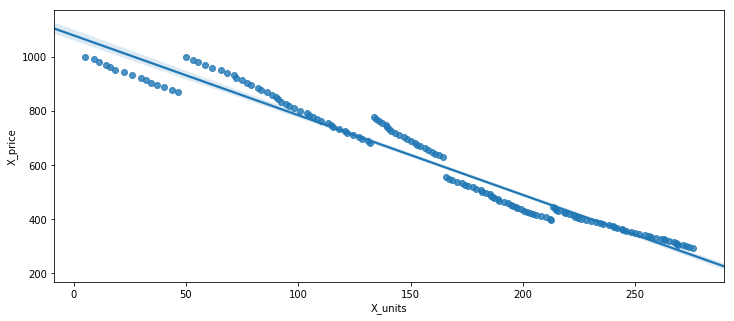

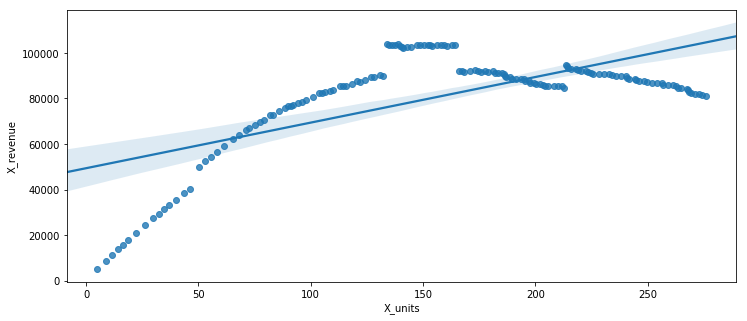

In [2]:
# let's consider units and price of product X
# sns.pairplot(df, kind='reg', height=8, x_vars=['X_units'], y_vars=['X_price']);
plt.figure(figsize=(12, 5))
sns.regplot(x=df["X_units"], y=df["X_price"], data=df);
# chart total revenue and units
plt.figure(figsize=(12, 5))
df['X_revenue'] = df.apply(lambda x: x.X_units * x.X_price, axis=1)
sns.regplot(x=df["X_units"], y=df["X_revenue"], data=df);

In [3]:
df.tail(1)

,cust_id,X_units,Y_units,Z_units,X_price,Y-price,Z_price,dm,em,sms,income,size_hh,X_revenue
151,1252,264.884108,418.513822,329.834006,318.672356,99.5,4.75,90.666488,333,52.126345,102215.120369,5,84411.243027


In [4]:
df.columns.tolist()

['cust_id',
 'X_units',
 'Y_units',
 'Z_units',
 'X_price',
 'Y-price',
 'Z_price',
 'dm',
 'em',
 'sms',
 'income',
 'size_hh',
 'X_revenue']

In [5]:
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

# Fit regression model

abt = df[['X_price', 'dm', 'em', 'sms', 'income', 'size_hh', 'X_units']]

lm_model = sm.ols(formula='X_units ~ X_price + dm + em + sms + income + size_hh', data=abt).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept    342.575747
X_price       -0.267804
dm            -0.285631
em            -0.140346
sms            0.503214
income         0.000404
size_hh        1.533921
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                X_units   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     878.3
Date:                Mon, 09 Sep 2019   Prob (F-statistic):          2.68e-111
Time:                        13:28:09   Log-Likelihood:                -593.52
No. Observations:                 152   AIC:                             1201.
Df Residuals:                     145   BIC:                             1222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    st

In [6]:
import statsmodels.api as sm
X = df[['X_price', 'dm', 'em', 'sms', 'income', 'size_hh']]
y = df['X_units']
# # leave behind one column as the "reference value" for that categorical variable
# X = pd.get_dummies(X, columns=['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], drop_first=True)

# build linear regressors to find the intercept and coefficient
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                X_units   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     878.3
Date:                Mon, 09 Sep 2019   Prob (F-statistic):          2.68e-111
Time:                        13:28:09   Log-Likelihood:                -593.52
No. Observations:                 152   AIC:                             1201.
Df Residuals:                     145   BIC:                             1222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        342.5757     20.967     16.338      0.000     301.135     384.017
X_price       -0.2678      0.017    -15.487      0.000      -0.302      -0.234
dm            -0.2856      0.063     -4.568      0.000      -0.409      -0.162
em            -0.1403      0.037     -3.835      0.000      -0.213      -0.068
sms            0.5032      0.109      4.611      0.000       0.288       0.719
income         0.0004   8.95e-05      4.510      0.000       0.000       0.001
size_hh        1.5339      0.692      2.216      0.028       0.166       2.902
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.244
Skew:                          -0.076   Prob(JB):                        0.885
Kurtosis:                       2.875   Cond. No.                     2.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Factor analysis on all independent variables except price
- removes collinearity, calculate price elasticity, price should have negative coefficient
- elasticity = coef on price * (avg price/avg quantity)
> Factors that affect qty: dm, em, sms, q2, q3, q4, advert, events, avg price

In [7]:
X.head(3)

,const,X_price,dm,em,sms,income,size_hh
0,1.0,702.744247,101.999799,219,20.114253,58732.004995,3
1,1.0,439.560000,132.772370,237,10.939556,126133.271105,7
2,1.0,753.964568,230.096669,198,14.294824,134320.600634,2


In [8]:
# svd
X = df[['dm', 'em', 'sms', 'income', 'size_hh']]
X_scaled = (X-X.mean())/X.std()
X_scaled.head(n=3)

,dm,em,sms,income,size_hh
0,-1.211726,-0.438809,0.060303,-1.293731,-0.633670
1,-0.356458,-0.164516,-0.509369,0.893729,1.322023
2,2.348495,-0.758818,-0.301035,1.159443,-1.122594


In [9]:
u, s, v = np.linalg.svd(X_scaled, full_matrices=True)
print(u.shape, s.shape, v.shape)

(152, 152) (5,) (5, 5)


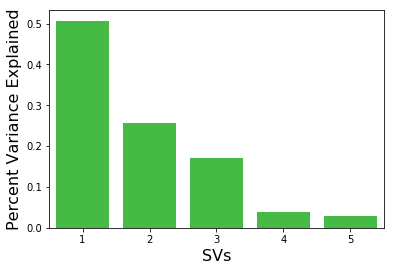

In [10]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [11]:
# Let us create a data frame containing the first two singular vectors (PCs) and the meta data for the data.
n = len(X.columns)
labels= ['SV'+str(i) for i in range(1,n+1)]
svd_df = pd.DataFrame(u[:,0:n], columns=labels)
# svd_df=svd_df.reset_index()
# svd_df.rename(columns={'index':'Continent'}, inplace=True)
svd_df.head()

,SV1,SV2,SV3,SV4,SV5
0,0.017577,0.131900,-0.008472,0.069669,-0.074073
1,-0.027475,-0.064828,-0.112458,0.018815,-0.100733
2,0.083129,-0.143679,0.128151,-0.019931,0.025477
3,-0.029675,-0.005917,-0.014116,-0.094325,0.056003
4,-0.034851,-0.073039,-0.149259,0.041863,-0.070051


In [12]:
svd_df['X_price'] = df['X_price']
X = svd_df
y = df['X_units']
# # leave behind one column as the "reference value" for that categorical variable
# X = pd.get_dummies(X, columns=['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], drop_first=True)

# build linear regressors to find the intercept and coefficient
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                X_units   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     878.3
Date:                Mon, 09 Sep 2019   Prob (F-statistic):          2.68e-111
Time:                        13:28:10   Log-Likelihood:                -593.52
No. Observations:                 152   AIC:                             1201.
Df Residuals:                     145   BIC:                             1222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        322.2215     10.645     30.271      0.000     301.183     343.260
SV1         -155.8640     45.048     -3.460      0.001    -244.900     -66.828
SV2          -58.1531     16.095     -3.613      0.000     -89.964     -26.342
SV3           -9.3398     12.470     -0.749      0.455     -33.987      15.308
SV4           70.5491     13.064      5.400      0.000      44.729      96.369
SV5          -58.3802     14.191     -4.114      0.000     -86.428     -30.332
X_price       -0.2678      0.017    -15.487      0.000      -0.302      -0.234
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.244
Skew:                          -0.076   Prob(JB):                        0.885
Kurtosis:                       2.875   Cond. No.                     3.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
vars(results)

{'_results': <statsmodels.regression.linear_model.OLSResults at 0x1c1938ef60>,
 '__doc__': '\n    Results class for for an OLS model.\n\n    Most of the methods and attributes are inherited from RegressionResults.\n    The special methods that are only available for OLS are:\n\n    - get_influence\n    - outlier_test\n    - el_test\n    - conf_int_el\n\n    See Also\n    --------\n    RegressionResults\n\n    '}

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1).sort_values(by='VIF Factor', ascending=False)

,VIF Factor,features
0,113.9,const
6,14.6,X_price
1,13.4,SV1
2,1.7,SV2
5,1.3,SV5
4,1.1,SV4
3,1.0,SV3


## try getting the price coefficient, but this time with price and units both normalized

In [15]:
svd_df.columns.tolist()

['SV1', 'SV2', 'SV3', 'SV4', 'SV5', 'X_price']

In [16]:
# (X-X.mean())/X.std()
# svd_df['X_price_norm'] = (df['X_price'] - df['X_price'].mean()) / df['X_price'].std()
# svd_df['X_units_norm'] = (df['X_units'] - df['X_units'].mean()) / df['X_units'].std()
X = svd_df[['SV1', 'SV2', 'SV3', 'SV4', 'SV5', 'X_price']]
y = df['X_units']
# # leave behind one column as the "reference value" for that categorical variable
# X = pd.get_dummies(X, columns=['MONTH', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], drop_first=True)

# build linear regressors to find the intercept and coefficient
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                X_units   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     878.3
Date:                Mon, 09 Sep 2019   Prob (F-statistic):          2.68e-111
Time:                        13:28:10   Log-Likelihood:                -593.52
No. Observations:                 152   AIC:                             1201.
Df Residuals:                     145   BIC:                             1222.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        322.2215     10.645     30.271      0.000     301.183     343.260
SV1         -155.8640     45.048     -3.460      0.001    -244.900     -66.828
SV2          -58.1531     16.095     -3.613      0.000     -89.964     -26.342
SV3           -9.3398     12.470     -0.749      0.455     -33.987      15.308
SV4           70.5491     13.064      5.400      0.000      44.729      96.369
SV5          -58.3802     14.191     -4.114      0.000     -86.428     -30.332
X_price       -0.2678      0.017    -15.487      0.000      -0.302      -0.234
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.244
Skew:                          -0.076   Prob(JB):                        0.885
Kurtosis:                       2.875   Cond. No.                     3.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
price_coefficient = results.params['X_price']
average_price = X['X_price'].mean()
average_quantity = df['X_units'].mean()
elasticity = abs(price_coefficient * (average_price / average_quantity))

In [87]:
# when elasticity > 1, we're on the elastic portion of the demand curve, so revenue follows price.

def total_revenue(prices, units, elasticity, percent_adjustment):
    """
    :param: price_adjustment is the percent increase in price, e.g. 10.  If decreasing price 10%, put -10.
    """
    if elasticity > 1:  # elastic, revenue follows price, so discount
        estimated_prices = prices * (1 + (percent_adjustment/100))
        units_decrease_percentage = percent_adjustment * elasticity
        estimated_units = units * (1 - (units_decrease_percentage/100))
        estimated_revenue = estimated_prices * estimated_units
    return sum(estimated_revenue)/10**6
        

total_revenue(prices=X['X_price'], units=df['X_units'], elasticity=elasticity, percent_adjustment=0)

12.31669692017833

In [88]:
[(total_revenue(prices=X['X_price'], units=df['X_units'], elasticity=elasticity, percent_adjustment=i), i) for i in np.arange(-101, 101, .5)]

[(-0.25231266610965575, -101.0),
 (-0.12583666548822142, -100.5),
 (0.0, -100.0),
 (0.125197330355017, -99.5),
 (0.24975532557682656, -99.0),
 (0.3736739856654289, -98.5),
 (0.496953310620824, -98.0),
 (0.6195933004430115, -97.5),
 (0.7415939551319921, -97.0),
 (0.8629552746877655, -96.5),
 (0.9836772591103317, -96.0),
 (1.1037599083996905, -95.5),
 (1.2232032225558422, -95.0),
 (1.3420072015787856, -94.5),
 (1.460171845468522, -94.0),
 (1.5776971542250506, -93.5),
 (1.6945831278483712, -93.0),
 (1.8108297663384862, -92.5),
 (1.9264370696953939, -92.0),
 (2.0414050379190947, -91.5),
 (2.1557336710095876, -91.0),
 (2.269422968966872, -90.5),
 (2.3824729317909514, -90.0),
 (2.494883559481823, -89.5),
 (2.606654852039487, -89.0),
 (2.7177868094639437, -88.5),
 (2.828279431755195, -88.0),
 (2.938132718913235, -87.5),
 (3.0473466709380657, -87.0),
 (3.1559212878296985, -86.5),
 (3.2638565695881177, -86.0),
 (3.37115251621333, -85.5),
 (3.4778091277053376, -85.0),
 (3.5838264040641357, -84.5

In [59]:
sum(X['X_price']*df['X_units'])

12316696.92017833

## Inventory Forecasts

## Behavioural Segmentation

## Elasticity for each segment and for each major product category
- different model for each product category

- simultaneous equations can be used for optimal pricing and understanding cannibalization between products, brands